# Matplotlib Library

In [1]:
# Import required modules
import matplotlib.pyplot as plt
import numpy as np

## Create stacked area graph of 3 time series

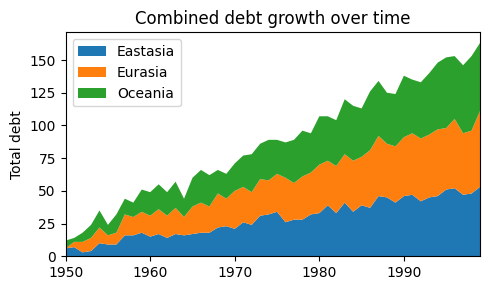

In [2]:
# Create 3 random time series
rng = np.arange(50)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5, 3))
# Create a stacked area chart
ax.stackplot(yrs, rng + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])
ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
# Applies to entire Figure object to clean up whitespace padding
fig.tight_layout()
plt.show()

## Multiple subplots (Axes) within one Figure

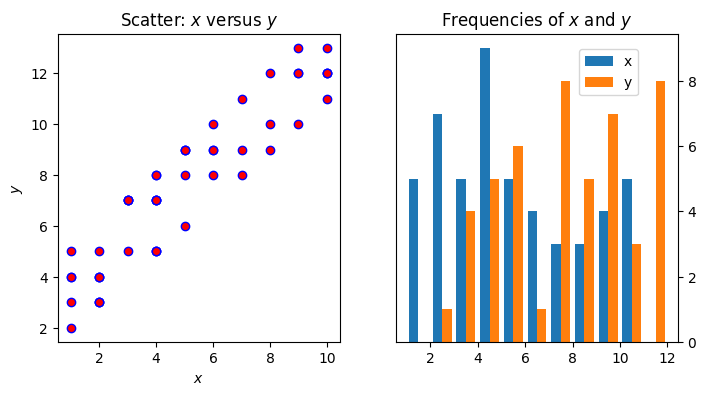

In [3]:
x = np.random.randint(low=1, high=11, size=50)
y = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y))

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
# '$' utilizes TeX markup to put variables in italics
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()),
          label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()
plt.show()

## Advanced subplot features

<Axes: >

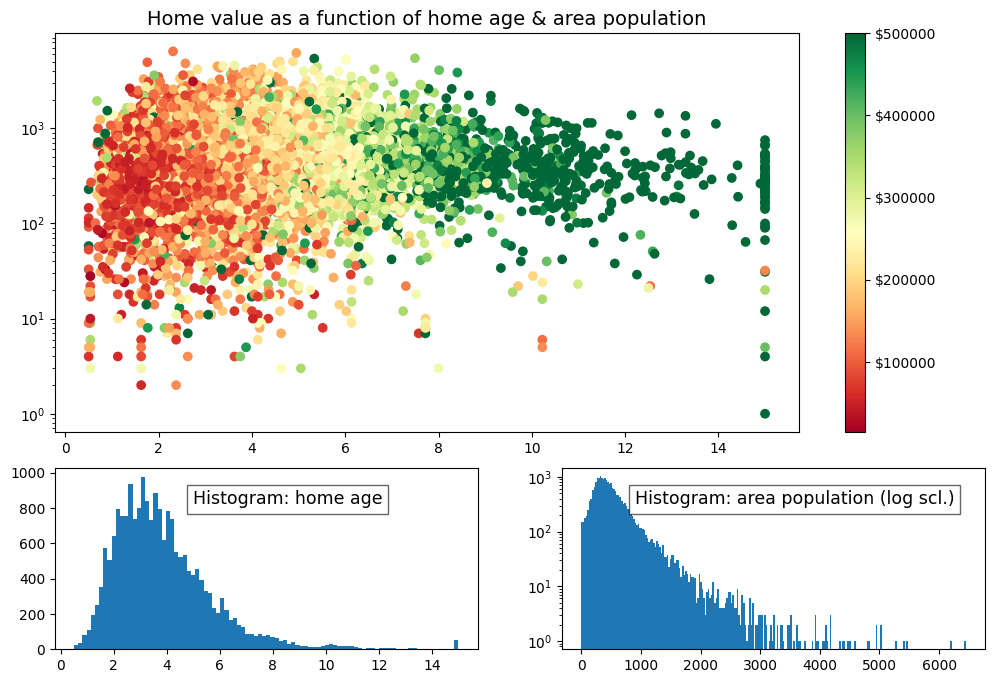

In [9]:
import numpy as np
import tarfile
from io import BytesIO
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode='r', fileobj=b) as archive:
    housing = np.loadtxt(archive.extractfile(fpath), delimiter=',')

# An area's average home value
y = housing[:, -1]
# The area's population and average house age
pop, age = housing[:, [4, 7]].T

def add_titlebox(ax, text):
    ax.text(.55, .8, text,
            horizontalalignment='center',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.6),
            fontsize=12.5)
    return ax

# Create a 3x2 grid
gridsize = (3, 2)
fig = plt.figure(figsize=(12, 8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(gridsize, (2, 0))
ax3 = plt.subplot2grid(gridsize, (2, 1))

ax1.set_title('Home value as a function of home age & area population',
              fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap='RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age, bins='auto')
ax3.hist(pop, bins='auto', log=True)

add_titlebox(ax2, 'Histogram: home age')
add_titlebox(ax3, 'Histogram: area population (log scl.)')

## Clear Figure objects after use

Close diagrams after use using `plt.close()` , `plt.close(num)` (which closes the figure number num) or `plt.close('all')` (which closes all figures) to avoid a `MemoryError`.

In [12]:
# Get the number of Figures still in memory
plt.get_fignums()

# Function to get all Figures by mapping of plt.figure() to each of the integers
def get_all_figures():
    return [plt.figure(i) for i in plt.get_fignums()]

get_all_figures()

[]

## `imshow()` and `matshow()`

In [13]:
import numpy as np

x = np.diag(np.arange(2, 12))[::-1]
x[np.diag_indices_from(x[::-1])] = np.arange(2, 12)
x2 = np.arange(x.size).reshape(x.shape)

sides = ('left', 'right', 'top', 'bottom')
nolabels = {s: False for s in sides}
nolabels.update({'label%s' % s: False for s in sides})
print(nolabels)

{'left': False, 'right': False, 'top': False, 'bottom': False, 'labelleft': False, 'labelright': False, 'labeltop': False, 'labelbottom': False}


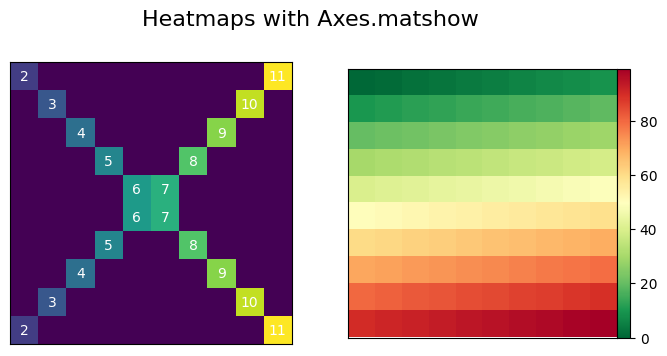

In [14]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

with plt.rc_context(rc={'axes.grid': False}):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.matshow(x)
    img2 = ax2.matshow(x2, cmap='RdYlGn_r')
    for ax in (ax1, ax2):
        ax.tick_params(axis='both', which='both', **nolabels)
    for i, j in zip(*x.nonzero()):
        ax1.text(j, i, x[i, j], color='white', ha='center', va='center')

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0)
    plt.colorbar(img2, cax=cax, ax=[ax1, ax2])
    fig.suptitle('Heatmaps with Axes.matshow', fontsize=16)

## Plotting in Pandas

C:\Users\yungng07\AppData\Local\Temp\ipykernel_18828\3017990492.py:5: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',


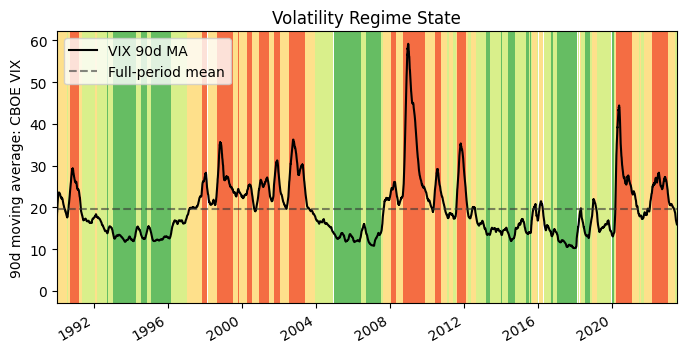

In [31]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url, index_col=0, parse_dates=True, na_values='.',
                  infer_datetime_format=True).dropna()
vix = vix.squeeze('columns')
ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins=[-np.inf, 14, 18, 24, np.inf],
               labels=range(4))

# ColorMap: mapping of floats to RGBA color, _r: reversed Red-Yellow-Green colormap
cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color='black', linewidth=1.5, marker='', figsize=(8,4),
        label='VIX 90d MA')
# Get the current Axes that ma.plot() references
ax = plt.gca()
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime State')
ax.grid(False)
ax.legend(loc='upper center')
ax.set_xlim(xmin=ma.index[0], xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
# Get an RGBA sequence for colors at 20th, 40th, 60th and 80th percentile along the ColorMaps spectrum
for i, color in enumerate(cmap([0.2, 0.4, 0.6, 0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i, 
                    facecolor=color, transform=trans)
ax.axhline(vix.mean(), linestyle='dashed', color='xkcd:dark grey',
           alpha=0.6, label='Full-period mean', marker='')
# Display ax.axhline legend
plt.legend(loc='upper left')
# Remove '<matplotlib.legend.Legend at 0x1cce3d35f10>' line
plt.show()